<a href="https://colab.research.google.com/github/VickyThomas1/Weatherforcast/blob/main/weatherforcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/WeatherDataset.csv")
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
# Check for missing values
print(df.isnull().sum())

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


In [ ]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month
df['Day'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Weather'], drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

# scaling data except for date and weather columns
numerical_cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
import pandas as pd
numerical_cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

# Print the number of outliers for each column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"Number of outliers in '{col}':", len(outliers))

Number of outliers in 'Temp_C': 0
Number of outliers in 'Dew Point Temp_C': 0
Number of outliers in 'Rel Hum_%': 2
Number of outliers in 'Wind Speed_km/h': 162
Number of outliers in 'Visibility_km': 3539
Number of outliers in 'Press_kPa': 207


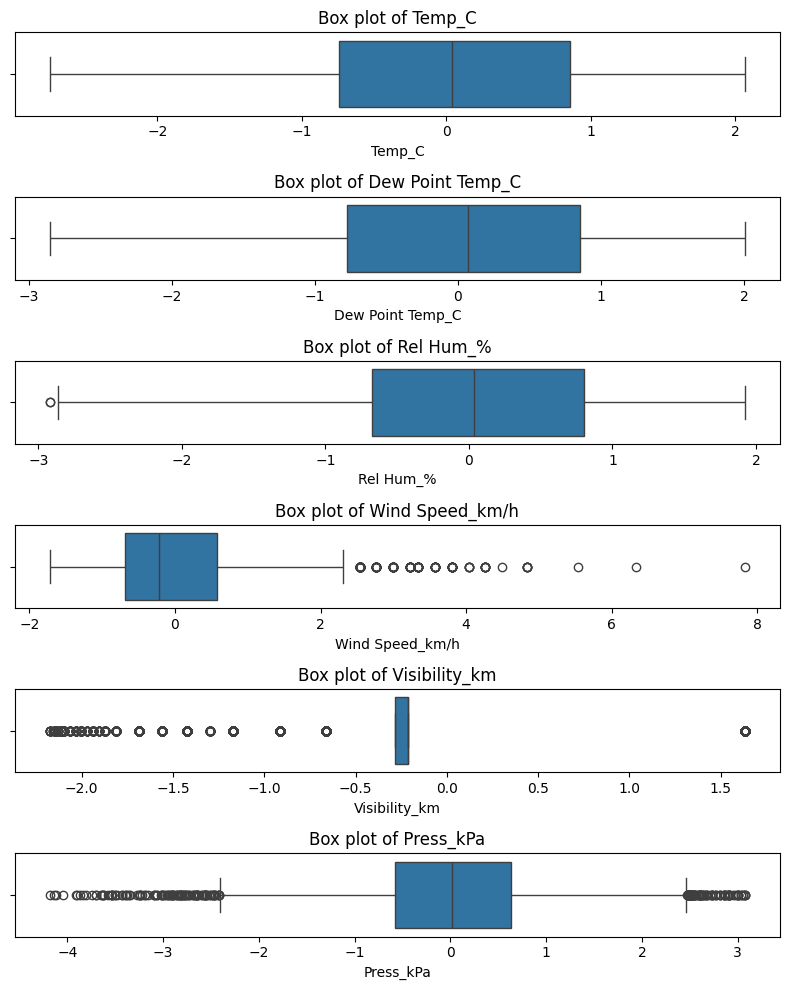

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
f, axes = plt.subplots(len(numerical_cols), 1, figsize=(8, 10))

# Plot a box plot for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
#checking the updated summary statistics for the numerical columns
print(df.describe())

             Temp_C  Dew Point Temp_C     Rel Hum_%  Wind Speed_km/h  \
count  8.784000e+03      8.784000e+03  8.784000e+03     8.784000e+03   
mean  -5.176996e-17     -3.882747e-17  1.423674e-16    -4.853434e-17   
std    1.000057e+00      1.000057e+00  1.000057e+00     1.000057e+00   
min   -2.746432e+00     -2.853704e+00 -2.921854e+00    -1.720203e+00   
25%   -7.442442e-01     -7.769658e-01 -6.757152e-01    -6.843153e-01   
50%    4.294056e-02      6.843184e-02  3.359196e-02    -2.239208e-01   
75%    8.557944e-01      8.495058e-01  8.020080e-01     5.817695e-01   
max    2.070797e+00      2.007333e+00  1.925078e+00     7.832983e+00   

       Visibility_km     Press_kPa    Year        Month          Day  \
count   8.784000e+03  8.784000e+03  8784.0  8784.000000  8784.000000   
mean   -2.394361e-16  6.137976e-15  2012.0     6.513661    15.756831   
std     1.000057e+00  1.000057e+00     0.0     3.451430     8.812031   
min    -2.175924e+00 -4.184603e+00  2012.0     1.000000     1.0

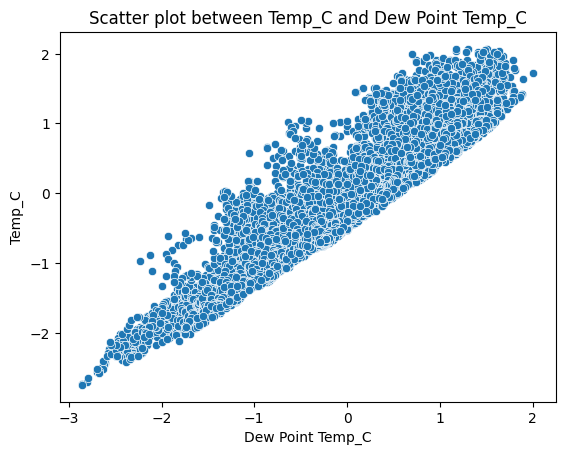

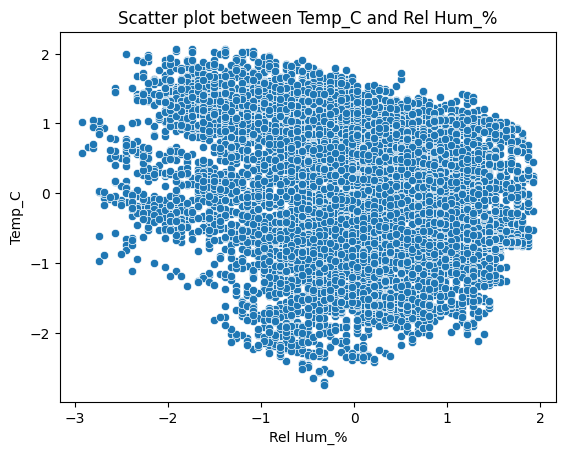

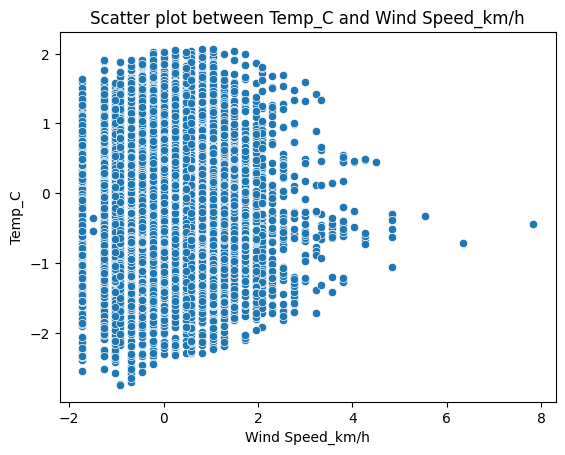

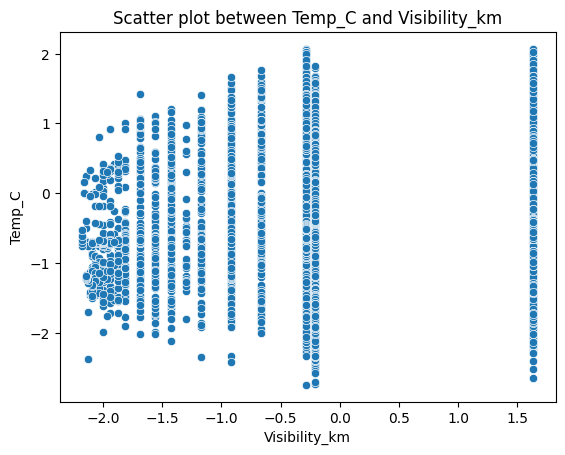

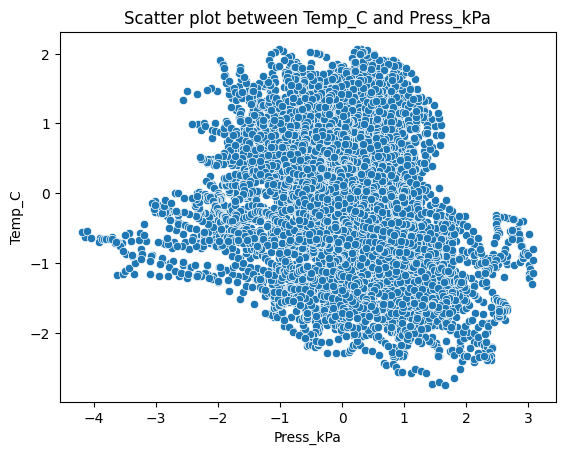

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#'Temp_C' is the dependent variable and others are independent variables
independent_vars = ['Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

for var in independent_vars:
    sns.scatterplot(x=df[var], y=df['Temp_C'])
    plt.xlabel(var)
    plt.ylabel('Temp_C')
    plt.title(f'Scatter plot between Temp_C and {var}')
    plt.show()

In [ ]:
import statsmodels.api as sm

#'Temp_C' is the dependent variable
X = df[independent_vars] # Independent variables
y = df['Temp_C']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Temp_C   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.589e+05
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:37:05   Log-Likelihood:                 10923.
No. Observations:                8784   AIC:                        -2.183e+04
Df Residuals:                    8778   BIC:                        -2.179e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.527e-16      0.001  

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Coefficients
print("Coefficients:", model.coef_)

# Intercept
print("Intercept:", model.intercept_)

# R-squared value
print("R-squared:", model.score(X_test, y_test))

Coefficients: [ 0.          0.98009346 -0.36014786 -0.0033195  -0.00375974 -0.00605457]
Intercept: -0.000232854344740005
R-squared: 0.9952534434486026


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Make predictions on the testing set
y_pred_before_fs = model.predict(X_test)

# Evaluate model performance before feature selection
mse_before_fs = mean_squared_error(y_test, y_pred_before_fs)
r2_before_fs = r2_score(y_test, y_pred_before_fs)

print("Before feature selection:")
print("Mean Squared Error:", mse_before_fs)
print("R-squared:", r2_before_fs)

Before feature selection:
Mean Squared Error: 0.005032641580313538
R-squared: 0.9952534434486026


In [ ]:
from sklearn.linear_model import LassoCV

# Fit Lasso regression model for feature selection
lasso_model = LassoCV(cv=5)
lasso_model.fit(X_train, y_train)

# Select features with non-zero coefficients
selected_features = X_train.columns[lasso_model.coef_ != 0]

# Retrain the model with selected features
model_after_fs = LinearRegression()
model_after_fs.fit(X_train[selected_features], y_train)

# Make predictions on the testing set
y_pred_after_fs = model_after_fs.predict(X_test[selected_features])

# Evaluate model performance after feature selection
mse_after_fs = mean_squared_error(y_test, y_pred_after_fs)
r2_after_fs = r2_score(y_test, y_pred_after_fs)

print("\nAfter feature selection:")
print("Mean Squared Error:", mse_after_fs)
print("R-squared:", r2_after_fs)


After feature selection:
Mean Squared Error: 0.005032641580313525
R-squared: 0.9952534434486026
